In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path  =  r"C:\Users\C S\Downloads\CreditRisk.csv"

In [3]:
cr  =  pd.read_csv(path )

### Basic Checks

In [4]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
cr.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0.0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [6]:
cr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
cr.shape

(981, 13)

In [9]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [10]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
cr.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

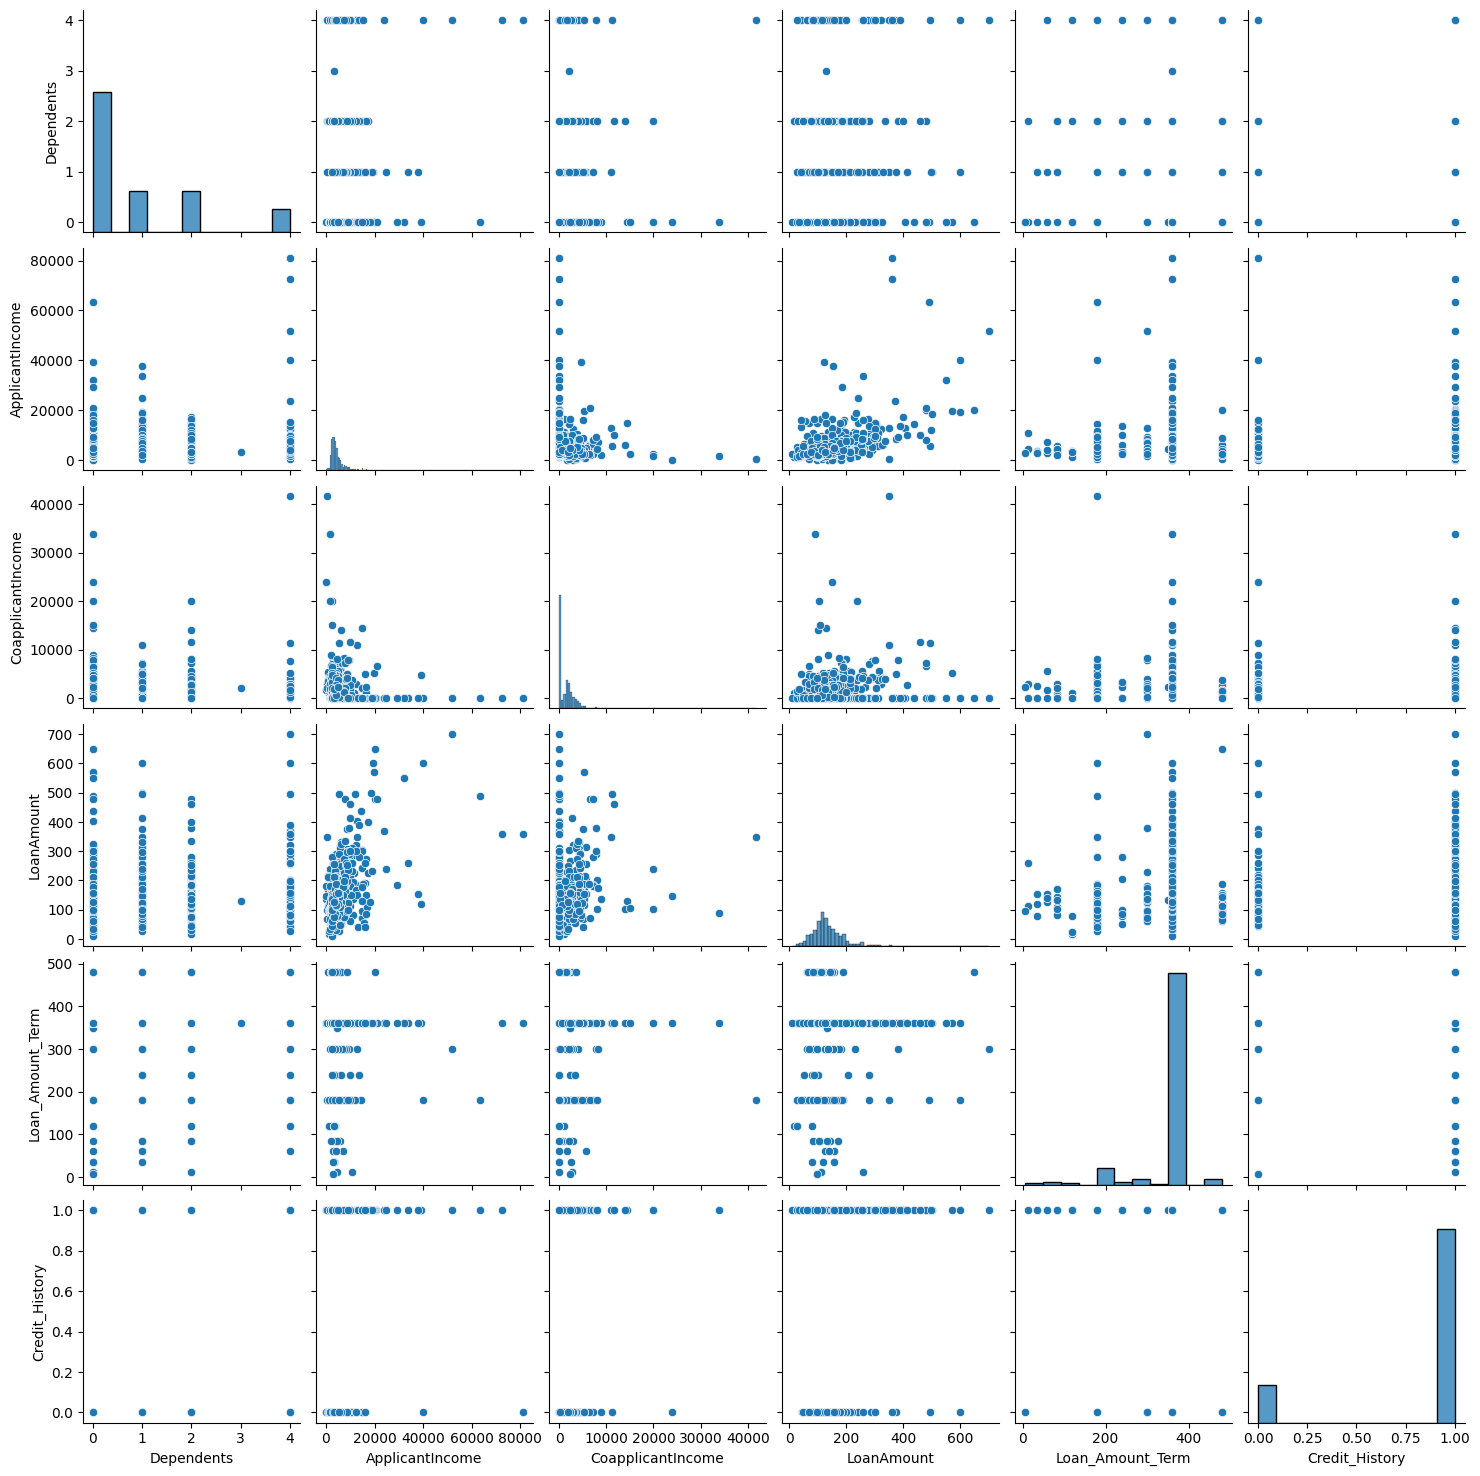

In [13]:
sns.pairplot(cr)

In [14]:
cr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
# Drop loan id 
cr.drop(['Loan_ID'] , axis  =  1 , inplace  = True)

In [17]:
# Check duplicates
cr.duplicated().sum()
cr.drop_duplicates(ignore_index= True ,inplace= True)

In [18]:
cr.duplicated().sum()

np.int64(0)

### seperate depedent and independent variables

In [20]:
x  =  cr.drop(['Loan_Status'] , axis   = 1)
y  =  cr['Loan_Status']

In [21]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [22]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [25]:
# treat dependent variable
from sklearn.preprocessing import LabelEncoder
le  =  LabelEncoder()
y  =  le.fit_transform(y)

In [27]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [28]:
# create pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [46]:
# Sepearte cat and num data
cat  =  list(x.columns[x.dtypes == 'object'])
num  = list(x.columns[x.dtypes != 'object'])

In [47]:
print(cat)
print()
print()
print(num)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']


['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [48]:
num_pipeline = Pipeline(steps =  [('scaler' , StandardScaler() )  ,
                                  ('imputer' , SimpleImputer(strategy= 'mean'))])

cat_pipeline =  Pipeline(steps= [('enocoder' , OrdinalEncoder()) ,
                                 ('imputer' , SimpleImputer(strategy = 'most_frequent' ))])

pre =  

In [49]:
prep =  ColumnTransformer([('num_pipeline' , num_pipeline , num),
                           ('cat_pipeline'  , cat_pipeline , cat)])

In [50]:
prep

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer', SimpleImputer())]),
                                 ['Dependents', 'ApplicantIncome',
                                  'CoapplicantIncome', 'LoanAmount',
                                  'Loan_Amount_Term', 'Credit_History']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('enocoder', OrdinalEncoder()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed', 'Property_Area'])])

In [51]:
cat

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [52]:
x.columns
cat
num

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [53]:
x1 = prep.fit_transform(x) 

In [54]:
x1  =  pd.DataFrame(x1 , columns = prep.get_feature_names_out())

In [55]:
x1.head()

,num_pipeline__Dependents,num_pipeline__ApplicantIncome,num_pipeline__CoapplicantIncome,num_pipeline__LoanAmount,num_pipeline__Loan_Amount_Term,num_pipeline__Credit_History,cat_pipeline__Gender,cat_pipeline__Married,cat_pipeline__Education,cat_pipeline__Self_Employed,cat_pipeline__Property_Area
0,-0.702501,0.117271,-0.590318,6.344132e-17,0.271832,0.443631,1.0,0.0,0.0,0.0,2.0
1,0.096290,-0.104923,-0.035742,-1.886043e-01,0.271832,0.443631,1.0,1.0,0.0,0.0,0.0
2,-0.702501,-0.382753,-0.590318,-9.893077e-01,0.271832,0.443631,1.0,1.0,0.0,1.0,2.0
3,-0.702501,-0.455940,0.276851,-2.919209e-01,0.271832,0.443631,1.0,1.0,1.0,0.0,2.0
4,-0.702501,0.143773,-0.590318,-2.071486e-02,0.271832,0.443631,1.0,0.0,0.0,0.0,2.0


In [56]:
from sklearn.linear_model import  LogisticRegression

In [57]:
model  =   LogisticRegression()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train  , x_test  , y_train ,y_test  = train_test_split(x1 , y , test_size  =0.2 , random_state  =  45)

In [61]:
print(x_train.shape , x_test.shape  , y_train.shape ,y_test.shape)

(783, 11) (196, 11) (783,) (196,)


In [62]:
model.fit(x_train ,  y_train)

LogisticRegression()

In [64]:
model.score(x_train , y_train)

0.8620689655172413

In [ ]:
# Training Evaluation